Look into the following:
- Trait value distributions
- Trait variance across replicates for each genotype and set
- Correlation between single mutants and double mutant fitness values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../ara_data/fitness_data_for_Kenia_09232024_all_corrected_brianna.txt',
    sep='\t')

#### Distribution of trait means per genotype
Raw traits before batch correction

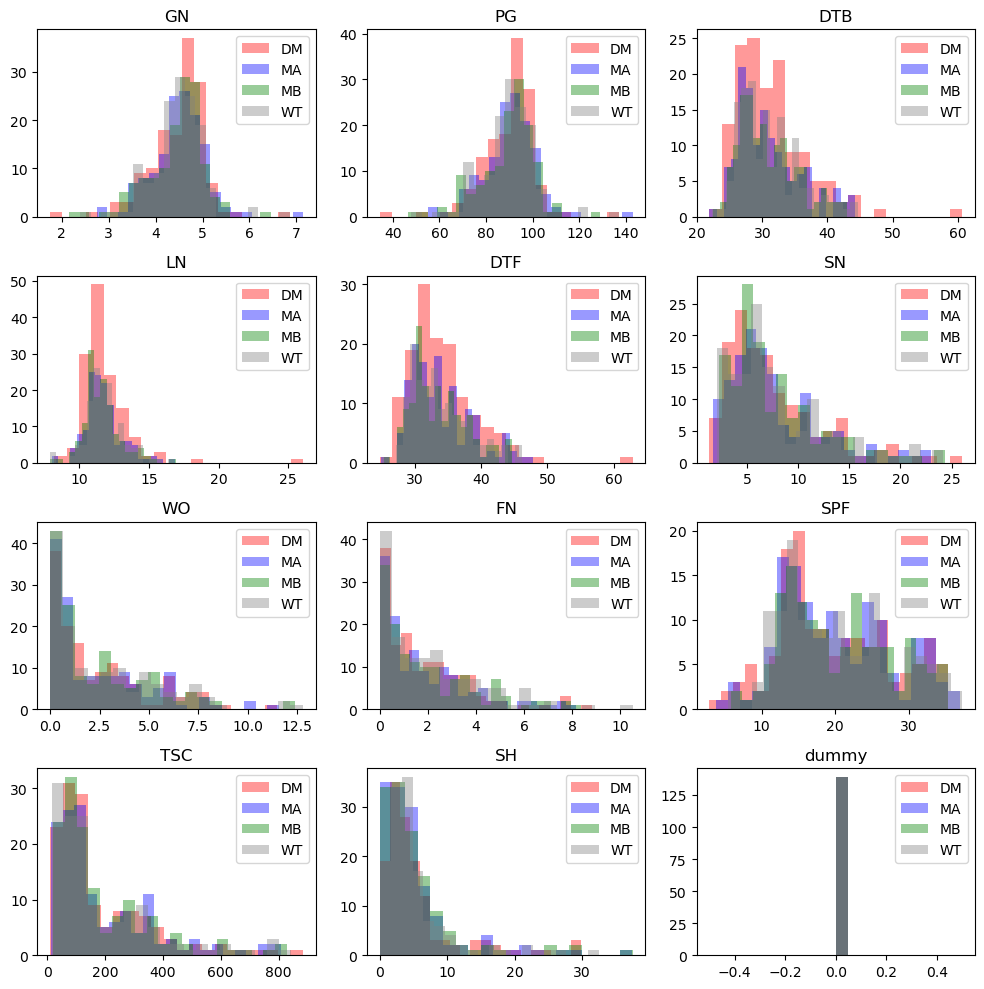

In [2]:
trait_means = data[['Set', 'Genotype', 'GN', 'PG', 'DTB', 'LN', 'DTF', 'SN',
    'WO', 'FN', 'SPF', 'TSC', 'SH']].groupby(['Set', 'Genotype']).mean()
trait_means['dummy'] = 0

# Plot the distribution of means for each trait per genotype
fig, ax = plt.subplots(4, 3, figsize=(10,10))
geno_colors = ['red', 'blue', 'green', 'gray']
for i, trait in enumerate(trait_means.columns):
    row_idx, col_idx = divmod(i, 3)
    for j, geno in enumerate(['DM', 'MA', 'MB', 'WT']):
        ax[row_idx][col_idx].hist(trait_means.loc[(slice(None), geno), trait],
            bins=20, alpha=0.4, label=geno, color=geno_colors[j])
            # fill=False, linewidth=2, edgecolor=geno_colors[j])
    
    ax[row_idx][col_idx].set_title(trait)
    ax[row_idx][col_idx].legend()

plt.tight_layout()
plt.show()

Distribution of trait values of genotype estimated means (after batch correction)

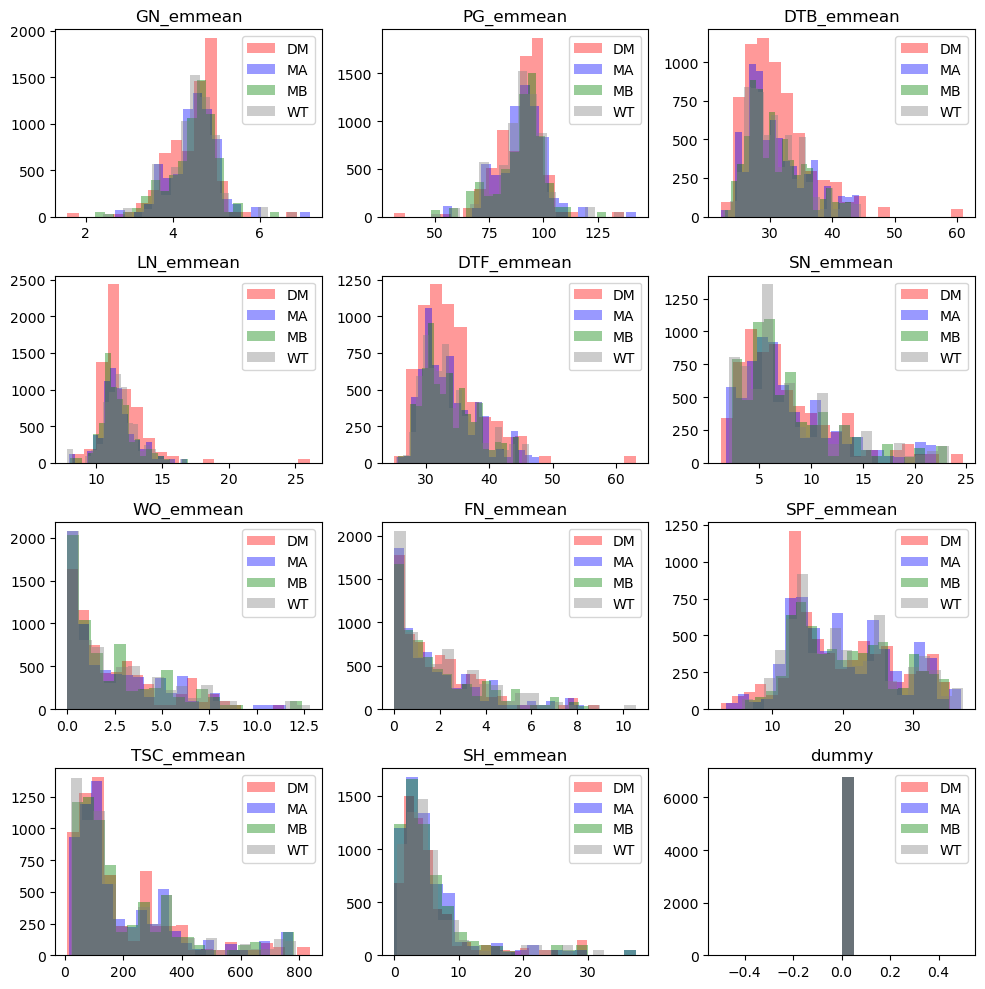

In [3]:
trait_emm = data[['Set', 'Genotype'] + [c for c in data.columns \
    if c.endswith('_emmean')]].set_index(['Set', 'Genotype'])
trait_emm['dummy'] = 0

# Plot the distribution of means for each trait per genotype
fig, ax = plt.subplots(4, 3, figsize=(10,10))
geno_colors = ['red', 'blue', 'green', 'gray']
for i, trait in enumerate(trait_emm.columns):
    row_idx, col_idx = divmod(i, 3)
    for j, geno in enumerate(['DM', 'MA', 'MB', 'WT']):
        ax[row_idx][col_idx].hist(trait_emm.loc[(slice(None), geno), trait],
            bins=20, alpha=0.4, label=geno, color=geno_colors[j])
            
    ax[row_idx][col_idx].set_title(trait)
    ax[row_idx][col_idx].legend()

plt.tight_layout()
plt.show()

#### Distribution of trait variance per genotype
Raw traits before batch correction  
Note: genotype estimated marginal means will have no variance, thus no point in plotting those

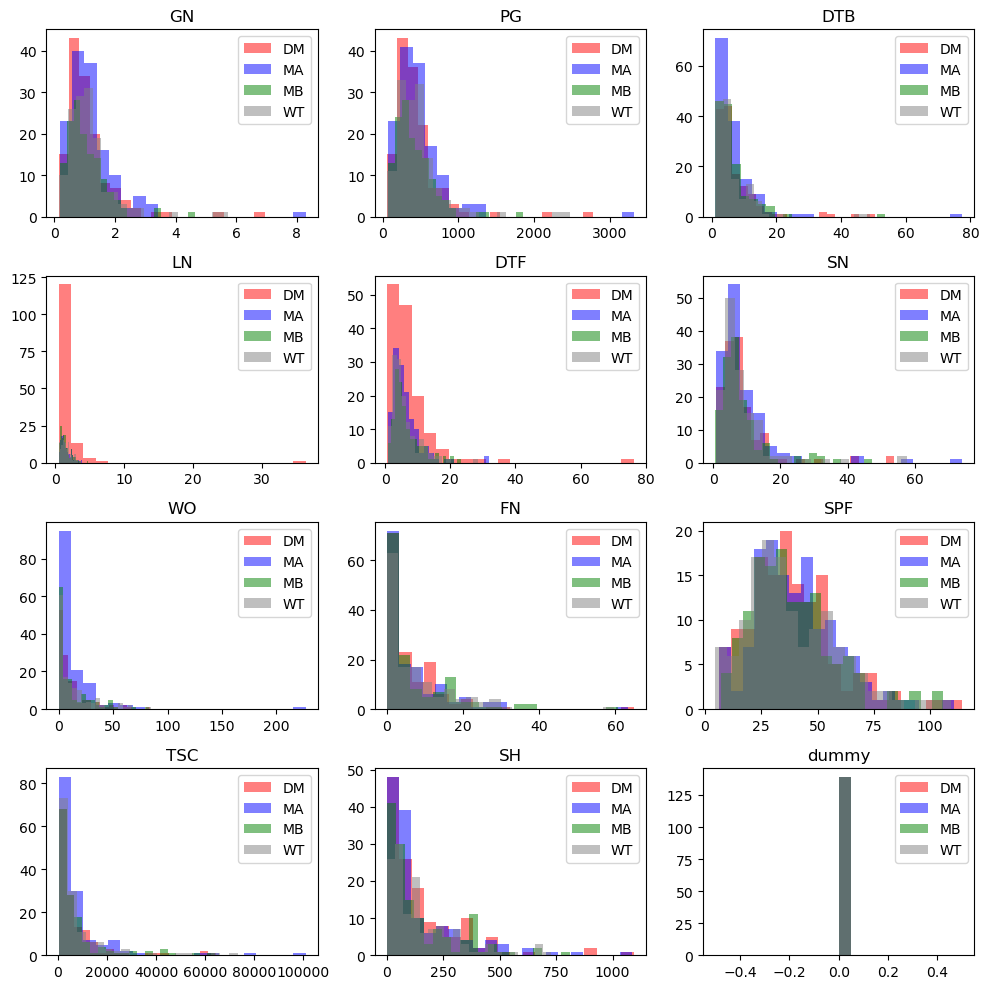

In [4]:
# Calculate the trait variance for each genotype in each set
trait_vars = data[['Set', 'Genotype', 'GN', 'PG', 'DTB', 'LN', 'DTF', 'SN', 'WO', 'FN',
      'SPF', 'TSC', 'SH']].groupby(['Set', 'Genotype']).var()
trait_vars['dummy'] = 0

# Plot the variance distributions for each trait
fig, ax = plt.subplots(4, 3, figsize=(10,10))
geno_colors = ['red', 'blue', 'green', 'gray']
for i, trait in enumerate(trait_vars.columns):
    row_idx, col_idx = divmod(i, 3)
    for j, geno in enumerate(['DM', 'MA', 'MB', 'WT']):
        ax[row_idx][col_idx].hist(trait_vars.loc[(slice(None), geno), trait],
            bins=20, alpha=0.5, color=geno_colors[j], label=geno)
    
    ax[row_idx][col_idx].set_title(trait)
    ax[row_idx][col_idx].legend()

plt.tight_layout()
plt.show()

#### Trait correlations between genotypes
Raw trait value genotype means

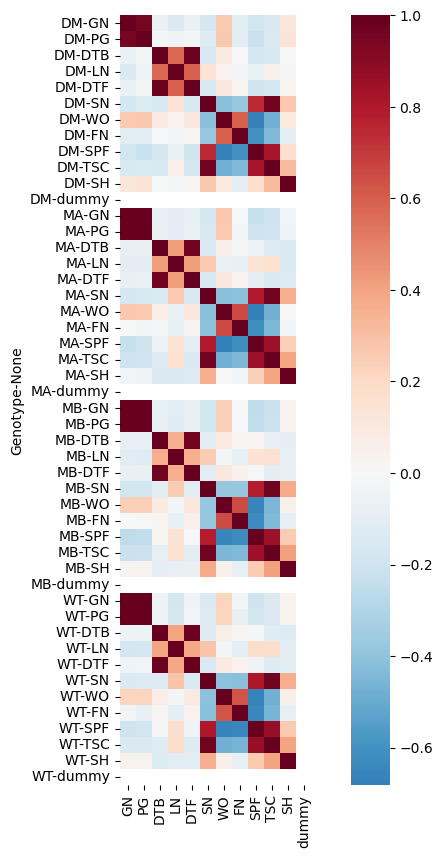

In [5]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
sns.heatmap(trait_means.groupby('Genotype').corr(), cmap='RdBu_r', center=0, square=True)
plt.show()

Batch corrected trait genotype estimated marginal means

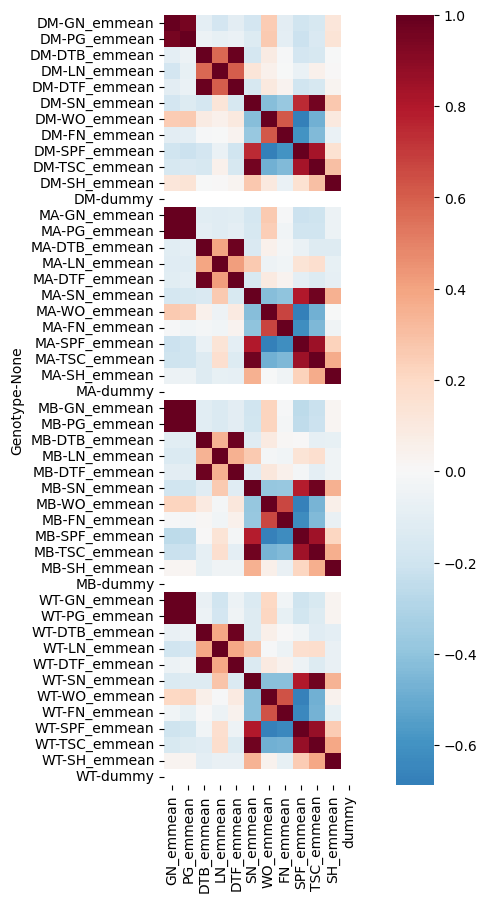

In [6]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(trait_emm.groupby('Genotype').corr(), cmap='RdBu_r', center=0, square=True)
plt.show()